# Question 1 (Line and Memory Profiler with Old Code)

In [22]:
%%file HW3Q1.py
#References

#[1]https://www.w3schools.com/python/ref_random_seed.asp
#[2]https://stackoverflow.com/questions/66425508/what-is-the-meaning-of-for-in-range
#[3]https://pythoninchemistry.org/sim_and_scat/important_considerations/pbc.html
#[4]https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
#[5]https://github.com/MrFuguDataScience/Python_Basics/blob/main/Python_Profiling.ipynb
#[6]https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb


#importing libraries
%pip install line_profiler
%pip install memory_profiler
%load_ext line_profiler
%load_ext memory_profiler


import numpy as np
import matplotlib.pyplot as plt
import time
from line_profiler import LineProfiler





def simulate_ising(L, init_state, T, J, N_mc, random_seed=None):
  '''
  A function that takes in a grid size, initial state, Temperature
  J, Monte Carlo steps, and random seed. This builds a 2D Ising model using the
  Metropolis algorithm.

  This function also calculates t_simulate, the time required per MC cycle.
  '''

  np.random.seed(random_seed) #initializing RNG [1]

  #First step is to initialize spins of ising grid
  # all_up = +1 , all_down = -1, random = +1 or -1
  if init_state == "all_up":
    state = np.ones((L,L))
  elif init_state == "all_down":
    state = -np.ones((L,L))
  elif init_state == "random":
    state = np.random.choice([-1,1], size=(L, L))

  #Initialize trajectory array and time spent per MC cycle array
  trajectory = []
  time_per_mcmove = []

  for step in range(N_mc):
    t_start = time.time()
    for _ in range(L*L):
      #picking a random spin with coordinates (i,j)
      i, j = np.random.randint(0, L), np.random.randint(0, L)  # Pick a random site
      # Uses the % operator to get periodic boundary conditions - position % L
      spin = state[i, j]
      #defining the neighbors
      neighbors = state[(i+1)%L, j] + state[(i-1)%L, j] + state[i, (j+1)%L] + state[i, (j-1)%L]  # Periodic boundary conditions [3]
      dE = 2*J*spin*neighbors
      if dE < 0 or np.random.rand() < np.exp(-dE / T):  # Metropolis criterion
        state[i, j] *= -1 # if conditional is met, spin is flipped
    t_end = time.time()
    time_per_mcmove.append(t_end - t_start) #expression to calculate the execution time of mc_move
    trajectory.append(state.copy())

  t_simulate = np.mean(time_per_mcmove) #averages the execution time from the 1500 MC steps

  return np.array(trajectory), t_simulate

'''def plot_state(trajectory, step):
  ising_grid = trajectory[step]

  plt.imshow(ising_grid, cmap='gray') #Purpose of imshow - each site (represented by a square) is denoted by an upspin or downspin [4]
  plt.title(f'Trajectory Plot at Step {step}')
  plt.colorbar(label ='spin')
  plt.show()
'''

'''
def run_simulations(grid_size, T, J, N_mc):
  """
  Calculate t_simulate for each N (LxL)
  """

  times_per_cycle = []
  errors = []

  for L in grid_size:
    _, avg_time_per_cycle = simulate_ising(L, init_state = init_state, T=T, J=J, N_mc = N_mc, random_seed=random_seed)
    times_per_cycle.append(avg_time_per_cycle)

    #Standard error for t_simulate
    std_error = np.std(times_per_cycle) / np.sqrt(len(times_per_cycle))
    errors.append(std_error)

    print(f'System size {L}x{L}: Avg time per MC cycle = {avg_time_per_cycle:.5f} seconds')

  return grid_size, times_per_cycle, errors

'''
'''
def calc_magnetization(trajectory):
  """
  Calculate magnetization for each Ising grid
  """
  magnetization = []
  L = trajectory.shape[1]
  for state in trajectory:
    M = np.sum(state) / (L*L)
    magnetization.append(M)
  return np.array(magnetization)


def run_mag_calc(grid_size, N_mc, J, random_seed=None):
  '''
  #Calculate average magnetization for each N (LxL)

'''

  magnetizations_values = []
  magnetizations_errors = []

  for L in grid_size :
      #Simulate ising at current grid size
      trajectory, _ = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)
      magnetization_all_steps = calc_magnetization(trajectory)

      #Updating magnetization array by getting rid of first 500 equilibration steps
      updated_magnetization = magnetization_all_steps[500:]

      #Average magnetization and standard deviation at each grid size
      avg_magnetization = np.mean(updated_magnetization)
      std_error = np.std(updated_magnetization) / np.sqrt(1000)

      #Store results
      magnetizations_values.append(avg_magnetization)
      magnetizations_errors.append(std_error)

      print(f'System size {L}x{L}: Magnetization = {avg_magnetization:.5f}')

  return magnetizations_values, magnetizations_errors
'''

'''
def sweep(L, temperatures, N_mc, J, random_seed=None):

  #Sweep function performs the simulate_ising function for the entire
  #temperature range. It then calculates the average magnetization at each temperature that will
  #be needed for one of the plots.


  temperatures=[]
  magnetizations = []

  for T in temperature_range:
      #Simulate ising at current temperature
      trajectory = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)

      #calculate magnetizations at each temperature
      mags = calc_magnetization(trajectory)
      #print(mags)

      #Average magnetization at current temperature
      avg_magnetization = np.mean(mags)
      #print(avg_magnetization)

      #Store results
      temperatures.append(T)
      magnetizations.append(avg_magnetization)

  return np.array(temperatures), np.array(magnetizations)

def plot_Mag_vs_Temp(temperatures, magnetizations):
  # Plot Magnetization vs Temperature
  plt.figure(figsize=(12, 5))
  plt.plot(temperatures, magnetizations, marker='o', linestyle='-', label = 'Average Magnetizations')
  plt.title("Magnetization vs Temperature")
  plt.xlabel("Temperature")
  plt.ylabel("Magnetization")
  plt.legend()
  plt.tight_layout()
  plt.show()


def plot_Mag_Time_Series(magnetization):
  #Plot Magnetization as Time Series
  plt.plot(magnetization)
  plt.xlabel('Monte Carlo Steps (Time)')
  plt.ylabel('Magnetization')
  plt.title('Magnetization vs Time at T = 2.27')
  plt.show()
'''

'''
def plot_tsim_vs_N(L_values, t_sim, tsim_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, t_sim, yerr=tsim_errors, fmt='o', color='r', label='Avg time per MC cycle')
  plt.plot(N_values, t_sim)
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('System Size N = LxL')
  plt.ylabel('t_simulate')
  plt.title('Time per MC cycle vs System Size')
  plt.legend()
  plt.show()

def plot_mag_vs_N(L_values, magnetizations_values, magnetizations_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, magnetizations_values, yerr=magnetizations_errors, fmt='o', color='r')
  plt.plot(N_values, magnetizations_values)
  plt.xlabel('System Size N = LxL')
  plt.ylabel('Magnetizations')
  plt.title('Magnetizations vs System Size')
  plt.show()
'''

#temperature_range = np.linspace(1, 4.0, 20)
init_state = "all_up" #initial state
grid_size = np.linspace(10,30,3, dtype=int) #grid size
J = 1.0
N_mc = 1500
T=5
random_seed = np.random.randint(0, N_mc)
step = np.random.randint(0, N_mc)

'''
#Running functions for t_sim vs N
L_values, t_simulate, tsim_errors = run_simulations(grid_size, T, J, N_mc)
plot_tsim_vs_N(L_values, t_simulate, tsim_errors)

#Running functions for Mag vs N
mag_values, mag_errors = run_mag_calc(grid_size, N_mc, J, random_seed=random_seed)
plot_mag_vs_N(L_values, mag_values, mag_errors)
'''


'''
# Plotting state functions near and not near critical temperature
trajectory_up = simulate_ising(L, init_state = 'all_up', T=1.5, J=1.0, N_mc=N_mc, random_seed=None) #mostly all have the same upspin and maintains magnetism
plot_state(trajectory_up, step)
trajectory_up_crit = simulate_ising(L, init_state = 'all_up', T=2.27, J=1.0, N_mc=N_mc, random_seed=None) #near the critical point and magnetism approaches 0
plot_state(trajectory_up_crit, step)
trajectory_up_after_crit = simulate_ising(L, init_state = 'all_up', T=4.0, J=1.0, N_mc=N_mc, random_seed=None) #magentism is near 0 and loses its magentic properties at high T
plot_state(trajectory_up_after_crit, step)

#Performing a sweep of temperature range and plotting Magnetization w/ temperature
temperatures, magnetizations = sweep(L, temperature_range, N_mc, J, random_seed)
plot_Mag_vs_Temp(temperatures, magnetizations)

#Plotting the Time Series Curve for Magnetization
trajectory_critical = simulate_ising(L, init_state = 'random', T=2.27, J=J, N_mc=N_mc, random_seed=None)
mag_at_tc = calc_magnetization(trajectory_critical)
plot_Mag_Time_Series(mag_at_tc)
'''

#Memory profiler for simulate_ising function
#@profile
#def memoryprofile_simulation():
#  for L in grid_size:
#    simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)


#lineprofile_simulation()



















Overwriting HW3Q1.py


In [23]:
#References

#[1]https://www.w3schools.com/python/ref_random_seed.asp
#[2]https://stackoverflow.com/questions/66425508/what-is-the-meaning-of-for-in-range
#[3]https://pythoninchemistry.org/sim_and_scat/important_considerations/pbc.html
#[4]https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
#[5]https://github.com/MrFuguDataScience/Python_Basics/blob/main/Python_Profiling.ipynb
#[6]https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb


#importing libraries
%pip install line_profiler
%pip install memory_profiler
%load_ext line_profiler
%load_ext memory_profiler


import numpy as np
import matplotlib.pyplot as plt
import time
from line_profiler import LineProfiler



def simulate_ising(L, init_state, T, J, N_mc, random_seed=None):
  '''
  A function that takes in a grid size, initial state, Temperature
  J, Monte Carlo steps, and random seed. This builds a 2D Ising model using the
  Metropolis algorithm.

  This function also calculates t_simulate, the time required per MC cycle.
  '''

  np.random.seed(random_seed) #initializing RNG [1]

  #First step is to initialize spins of ising grid
  # all_up = +1 , all_down = -1, random = +1 or -1
  if init_state == "all_up":
    state = np.ones((L,L))
  elif init_state == "all_down":
    state = -np.ones((L,L))
  elif init_state == "random":
    state = np.random.choice([-1,1], size=(L, L))

  #Initialize trajectory array and time spent per MC cycle array
  trajectory = []
  time_per_mcmove = []

  for step in range(N_mc):
    t_start = time.time()
    for _ in range(L*L):
      #picking a random spin with coordinates (i,j)
      i, j = np.random.randint(0, L), np.random.randint(0, L)  # Pick a random site
      # Uses the % operator to get periodic boundary conditions - position % L
      spin = state[i, j]
      #defining the neighbors
      neighbors = state[(i+1)%L, j] + state[(i-1)%L, j] + state[i, (j+1)%L] + state[i, (j-1)%L]  # Periodic boundary conditions [3]
      dE = 2*J*spin*neighbors
      if dE < 0 or np.random.rand() < np.exp(-dE / T):  # Metropolis criterion
        state[i, j] *= -1 # if conditional is met, spin is flipped
    t_end = time.time()
    time_per_mcmove.append(t_end - t_start) #expression to calculate the execution time of mc_move
    trajectory.append(state.copy())

  t_simulate = np.mean(time_per_mcmove) #averages the execution time from the 1500 MC steps

  return np.array(trajectory), t_simulate

'''def plot_state(trajectory, step):
  ising_grid = trajectory[step]

  plt.imshow(ising_grid, cmap='gray') #Purpose of imshow - each site (represented by a square) is denoted by an upspin or downspin [4]
  plt.title(f'Trajectory Plot at Step {step}')
  plt.colorbar(label ='spin')
  plt.show()
'''

'''
def run_simulations(grid_size, T, J, N_mc):
  """
  Calculate t_simulate for each N (LxL)
  """

  times_per_cycle = []
  errors = []

  for L in grid_size:
    _, avg_time_per_cycle = simulate_ising(L, init_state = init_state, T=T, J=J, N_mc = N_mc, random_seed=random_seed)
    times_per_cycle.append(avg_time_per_cycle)

    #Standard error for t_simulate
    std_error = np.std(times_per_cycle) / np.sqrt(len(times_per_cycle))
    errors.append(std_error)

    print(f'System size {L}x{L}: Avg time per MC cycle = {avg_time_per_cycle:.5f} seconds')

  return grid_size, times_per_cycle, errors

'''
'''
def calc_magnetization(trajectory):
  """
  Calculate magnetization for each Ising grid
  """
  magnetization = []
  L = trajectory.shape[1]
  for state in trajectory:
    M = np.sum(state) / (L*L)
    magnetization.append(M)
  return np.array(magnetization)


def run_mag_calc(grid_size, N_mc, J, random_seed=None):
  '''
  #Calculate average magnetization for each N (LxL)

'''

  magnetizations_values = []
  magnetizations_errors = []

  for L in grid_size :
      #Simulate ising at current grid size
      trajectory, _ = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)
      magnetization_all_steps = calc_magnetization(trajectory)

      #Updating magnetization array by getting rid of first 500 equilibration steps
      updated_magnetization = magnetization_all_steps[500:]

      #Average magnetization and standard deviation at each grid size
      avg_magnetization = np.mean(updated_magnetization)
      std_error = np.std(updated_magnetization) / np.sqrt(1000)

      #Store results
      magnetizations_values.append(avg_magnetization)
      magnetizations_errors.append(std_error)

      print(f'System size {L}x{L}: Magnetization = {avg_magnetization:.5f}')

  return magnetizations_values, magnetizations_errors
'''

'''
def sweep(L, temperatures, N_mc, J, random_seed=None):

  #Sweep function performs the simulate_ising function for the entire
  #temperature range. It then calculates the average magnetization at each temperature that will
  #be needed for one of the plots.


  temperatures=[]
  magnetizations = []

  for T in temperature_range:
      #Simulate ising at current temperature
      trajectory = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)

      #calculate magnetizations at each temperature
      mags = calc_magnetization(trajectory)
      #print(mags)

      #Average magnetization at current temperature
      avg_magnetization = np.mean(mags)
      #print(avg_magnetization)

      #Store results
      temperatures.append(T)
      magnetizations.append(avg_magnetization)

  return np.array(temperatures), np.array(magnetizations)

def plot_Mag_vs_Temp(temperatures, magnetizations):
  # Plot Magnetization vs Temperature
  plt.figure(figsize=(12, 5))
  plt.plot(temperatures, magnetizations, marker='o', linestyle='-', label = 'Average Magnetizations')
  plt.title("Magnetization vs Temperature")
  plt.xlabel("Temperature")
  plt.ylabel("Magnetization")
  plt.legend()
  plt.tight_layout()
  plt.show()


def plot_Mag_Time_Series(magnetization):
  #Plot Magnetization as Time Series
  plt.plot(magnetization)
  plt.xlabel('Monte Carlo Steps (Time)')
  plt.ylabel('Magnetization')
  plt.title('Magnetization vs Time at T = 2.27')
  plt.show()
'''

'''
def plot_tsim_vs_N(L_values, t_sim, tsim_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, t_sim, yerr=tsim_errors, fmt='o', color='r', label='Avg time per MC cycle')
  plt.plot(N_values, t_sim)
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('System Size N = LxL')
  plt.ylabel('t_simulate')
  plt.title('Time per MC cycle vs System Size')
  plt.legend()
  plt.show()

def plot_mag_vs_N(L_values, magnetizations_values, magnetizations_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, magnetizations_values, yerr=magnetizations_errors, fmt='o', color='r')
  plt.plot(N_values, magnetizations_values)
  plt.xlabel('System Size N = LxL')
  plt.ylabel('Magnetizations')
  plt.title('Magnetizations vs System Size')
  plt.show()
'''

#temperature_range = np.linspace(1, 4.0, 20)
init_state = "all_up" #initial state
grid_size = np.linspace(10,30,3, dtype=int) #grid size
J = 1.0
N_mc = 1500
T=5
random_seed = np.random.randint(0, N_mc)
step = np.random.randint(0, N_mc)

'''
#Running functions for t_sim vs N
L_values, t_simulate, tsim_errors = run_simulations(grid_size, T, J, N_mc)
plot_tsim_vs_N(L_values, t_simulate, tsim_errors)

#Running functions for Mag vs N
mag_values, mag_errors = run_mag_calc(grid_size, N_mc, J, random_seed=random_seed)
plot_mag_vs_N(L_values, mag_values, mag_errors)
'''


'''
# Plotting state functions near and not near critical temperature
trajectory_up = simulate_ising(L, init_state = 'all_up', T=1.5, J=1.0, N_mc=N_mc, random_seed=None) #mostly all have the same upspin and maintains magnetism
plot_state(trajectory_up, step)
trajectory_up_crit = simulate_ising(L, init_state = 'all_up', T=2.27, J=1.0, N_mc=N_mc, random_seed=None) #near the critical point and magnetism approaches 0
plot_state(trajectory_up_crit, step)
trajectory_up_after_crit = simulate_ising(L, init_state = 'all_up', T=4.0, J=1.0, N_mc=N_mc, random_seed=None) #magentism is near 0 and loses its magentic properties at high T
plot_state(trajectory_up_after_crit, step)

#Performing a sweep of temperature range and plotting Magnetization w/ temperature
temperatures, magnetizations = sweep(L, temperature_range, N_mc, J, random_seed)
plot_Mag_vs_Temp(temperatures, magnetizations)

#Plotting the Time Series Curve for Magnetization
trajectory_critical = simulate_ising(L, init_state = 'random', T=2.27, J=J, N_mc=N_mc, random_seed=None)
mag_at_tc = calc_magnetization(trajectory_critical)
plot_Mag_Time_Series(mag_at_tc)
'''

#Memory profiler for simulate_ising function
#@profile
#def memoryprofile_simulation():
#  for L in grid_size:
#    simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)


#lineprofile_simulation()

#Line Profiler [5]
%lprun -f simulate_ising simulate_ising(10, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)

















Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


Timer unit: 1e-07 s

Total time: 0.826179 s
File: C:\Users\mo241\AppData\Local\Temp\ipykernel_32712\2861817206.py
Function: simulate_ising at line 25

Line #      Hits         Time  Per Hit   % Time  Line Contents
    25                                           def simulate_ising(L, init_state, T, J, N_mc, random_seed=None):
    26                                             '''
    27                                             A function that takes in a grid size, initial state, Temperature
    28                                             J, Monte Carlo steps, and random seed. This builds a 2D Ising model using the
    29                                             Metropolis algorithm.
    30                                           
    31                                             This function also calculates t_simulate, the time required per MC cycle.
    32                                             '''
    33                                           
    34         1   

In [24]:
#Memory profiler[6]
from HW3Q1 import simulate_ising
%mprun -f simulate_ising simulate_ising(10, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)


Filename: c:\Users\mo241\Desktop\Phase Transition Code Files\HW3ImprovingIsingModel\HW3Q1.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     1                                         #References
     2                                         
     3                                         #[1]https://www.w3schools.com/python/ref_random_seed.asp
     4                                         #[2]https://stackoverflow.com/questions/66425508/what-is-the-meaning-of-for-in-range
     5                                         #[3]https://pythoninchemistry.org/sim_and_scat/important_considerations/pbc.html
     6                                         #[4]https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
     7                                         #[5]https://github.com/MrFuguDataScience/Python_Basics/blob/main/Python_Profiling.ipynb
     8                                         #[6]https://colab.research.google.com/github/jakevdp/PythonDataScien

Filename: c:\Users\mo241\anaconda3\Lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1185    148.0 MiB    148.0 MiB           1               @wraps(wrapped=func)
  1186                                                     def wrapper(*args, **kwargs):
  1187    148.0 MiB      0.0 MiB           1                   prof = get_prof()
  1188    149.1 MiB      1.1 MiB           1                   val = prof(func)(*args, **kwargs)
  1189    149.1 MiB      0.0 MiB           1                   show_results_bound(prof)
  1190    149.1 MiB      0.0 MiB           1                   return val

# Question 2 (Improving Code with Strategies)

In [44]:
%%file HW3Q2.py
#References

#[1]https://www.w3schools.com/python/ref_random_seed.asp
#[2]https://stackoverflow.com/questions/66425508/what-is-the-meaning-of-for-in-range
#[3]https://pythoninchemistry.org/sim_and_scat/important_considerations/pbc.html
#[4]https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
#[5]https://github.com/MrFuguDataScience/Python_Basics/blob/main/Python_Profiling.ipynb
#[6]https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb

#importing libraries
'''
%pip install line_profiler
%pip install memory_profiler
%load_ext line_profiler
%load_ext memory_profiler
'''

import numpy as np
import matplotlib.pyplot as plt
import time
from line_profiler import LineProfiler


def simulate_ising(L, init_state, T, J, N_mc, random_seed=None):
  '''
  A function that takes in a grid size, initial state, Temperature
  J, Monte Carlo steps, and random seed. This builds a 2D Ising model using the
  Metropolis algorithm.

  This function also calculates t_simulate, the time required per MC cycle.
  '''
  np.random.seed(random_seed)

  #First step is to initialize spins of ising grid
  # all_up = +1 , all_down = -1, random = +1 or -1
  # Using 8-bit integers to save memory
  if init_state == "all_up":
    state = np.ones((L,L), dtype=np.int8)
  elif init_state == "all_down":
    state = -np.ones((L,L), dtype=np.int8)
  elif init_state == "random":
    state = np.random.choice([-1,1], size=(L, L).astype(np.int8))

  #Initialize trajectory array and time spent per MC cycle array

  beta = 1/T

  trajectory = np.zeros((N_mc, L, L))
  time_per_mcmove = np.zeros(N_mc)
  

  for step in range(N_mc):
    t_start = time.time()

    # Precompute neighbors using np.roll for all sites
    neighbors = (np.roll(state, 1, axis=0) + np.roll(state, -1, axis=0) + np.roll(state, 1, axis=1) + np.roll(state, -1, axis=1)) #Periodic boundary conditions
   
    # Precompute random variables to reduce computation time
    random_indices = np.random.randint(0, L, size=(L * L, 2))
    random_numbers = np.random.random((L * L))   #creating indices in bulk rather than each L*L step 

    for idx in range(L*L):
      #picking a random spin with coordinates (i,j)
      i, j = random_indices[idx]  
        
      # Uses the % operator to get periodic boundary conditions - position % L
      spin = state[i, j]
      neighbors_sum = neighbors[i,j]

      dE = 2 * J * spin * neighbors_sum

      if dE < 0 or random_numbers[idx] < np.exp(-beta * dE):  # Metropolis criterion
        state[i,j] *= -1 # if conditional is met, spin is flipped

    t_end = time.time()
    #expression to calculate the execution time of mc_move
    time_per_mcmove[step] = t_end - t_start
    trajectory[step] = state.copy()
  t_simulate = np.mean(time_per_mcmove) #averages the execution time from the 1500 MC steps

  return trajectory, t_simulate

'''def plot_state(trajectory, step):
  ising_grid = trajectory[step]

  plt.imshow(ising_grid, cmap='gray') #Purpose of imshow - each site (represented by a square) is denoted by an upspin or downspin [4]
  plt.title(f'Trajectory Plot at Step {step}')
  plt.colorbar(label ='spin')
  plt.show()
'''
'''
def run_simulations(grid_size, T, J, N_mc):
  """
  Calculate t_simulate for each N (LxL)
  """

  times_per_cycle = []
  errors = []

  for L in grid_size:
    _, avg_time_per_cycle = simulate_ising(L, init_state = init_state, T=T, J=J, N_mc = N_mc, random_seed=random_seed)
    times_per_cycle.append(avg_time_per_cycle)

    #Standard error for t_simulate
    std_error = np.std(times_per_cycle) / np.sqrt(len(times_per_cycle))
    errors.append(std_error)

    print(f'System size {L}x{L}: Avg time per MC cycle = {avg_time_per_cycle:.5f} seconds')

  return grid_size, times_per_cycle, errors



def calc_magnetization(trajectory):
  """
  Calculate magnetization for each Ising grid
  """
  magnetization = []
  L = trajectory.shape[1]
  for state in trajectory:
    M = np.sum(state) / (L*L)
    magnetization.append(M)
  return np.array(magnetization)

'''
'''
def run_mag_calc(grid_size, N_mc, J, random_seed=None):
  '''
  #Calculate average magnetization for each N (LxL)

'''

  magnetizations_values = []
  magnetizations_errors = []

  for L in grid_size :
      #Simulate ising at current grid size
      trajectory, _ = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)
      magnetization_all_steps = calc_magnetization(trajectory)

      #Updating magnetization array by getting rid of first 500 equilibration steps
      updated_magnetization = magnetization_all_steps[500:]

      #Average magnetization and standard deviation at each grid size
      avg_magnetization = np.mean(updated_magnetization)
      std_error = np.std(updated_magnetization) / np.sqrt(1000)

      #Store results
      magnetizations_values.append(avg_magnetization)
      magnetizations_errors.append(std_error)

      print(f'System size {L}x{L}: Magnetization = {avg_magnetization:.5f}')

  return magnetizations_values, magnetizations_errors


'''

'''def sweep(L, temperatures, N_mc, J, random_seed=None):

  #Sweep functions performs the simulate_ising function for the entire
  #temperature range. It then calculates the average magnetization at each temperature that will
  #be needed for one of the plots.


  temperatures=[]
  magnetizations = []

  for T in temperature_range:
      #Simulate ising at current temperature
      trajectory = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)

      #calculate magnetizations at each temperature
      mags = calc_magnetization(trajectory)
      #print(mags)

      #Average magnetization at current temperaturer
      avg_magnetization = np.mean(mags)
      #print(avg_magnetization)

      #Store results
      temperatures.append(T)
      magnetizations.append(avg_magnetization)

  return np.array(temperatures), np.array(magnetizations)

def plot_Mag_vs_Temp(temperatures, magnetizations):
  # Plot Magnetization vs Temperature
  plt.figure(figsize=(12, 5))
  plt.plot(temperatures, magnetizations, marker='o', linestyle='-', label = 'Average Magnetizations')
  plt.title("Magnetization vs Temperature")
  plt.xlabel("Temperature")
  plt.ylabel("Magnetization")
  plt.legend()
  plt.tight_layout()
  plt.show()


def plot_Mag_Time_Series(magnetization):
  #Plot Magnetization as Time Series
  plt.plot(magnetization)
  plt.xlabel('Monte Carlo Steps (Time)')
  plt.ylabel('Magnetization')
  plt.title('Magnetization vs Time at T = 2.27')
  plt.show()
'''
'''
def plot_tsim_vs_N(L_values, t_sim, tsim_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, t_sim, yerr=tsim_errors, fmt='o', color='r', label='Avg time per MC cycle')
  plt.plot(N_values, t_sim)
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('System Size N = LxL')
  plt.ylabel('t_simulate')
  plt.title('Time per MC cycle vs System Size')
  plt.legend()
  plt.show()


def plot_mag_vs_N(L_values, magnetizations_values, magnetizations_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, magnetizations_values, yerr=magnetizations_errors, fmt='o', color='r')
  plt.plot(N_values, magnetizations_values)
  plt.xlabel('System Size N = LxL')
  plt.ylabel('Magnetizations')
  plt.title('Magnetizations vs System Size')
  plt.show()
'''

#temperature_range = np.linspace(1, 4.0, 20)
init_state = "all_up" #initial state
grid_size = np.linspace(10,30,3, dtype=int) #grid size
J = 1.0
N_mc = 1500
T=5

random_seed = np.random.randint(0, N_mc) #how to make it jax related??
step = np.random.randint(0, N_mc) #how to make it jax related??

'''
#Running functions for t_sim vs N
L_values, t_simulate, tsim_errors = run_simulations(grid_size, T, J, N_mc)
plot_tsim_vs_N(L_values, t_simulate, tsim_errors)

#Running functions for Mag vs N
mag_values, mag_errors = run_mag_calc(grid_size, N_mc, J, random_seed=random_seed)
plot_mag_vs_N(L_values, mag_values, mag_errors)
'''


'''
# Plotting state functions near and not near critical temperature
trajectory_up = simulate_ising(L, init_state = 'all_up', T=1.5, J=1.0, N_mc=N_mc, random_seed=None) #mostly all have the same upspin and maintains magnetism
plot_state(trajectory_up, step)
trajectory_up_crit = simulate_ising(L, init_state = 'all_up', T=2.27, J=1.0, N_mc=N_mc, random_seed=None) #near the critical point and magnetism approaches 0
plot_state(trajectory_up_crit, step)
trajectory_up_after_crit = simulate_ising(L, init_state = 'all_up', T=4.0, J=1.0, N_mc=N_mc, random_seed=None) #magentism is near 0 and loses its magentic properties at high T
plot_state(trajectory_up_after_crit, step)

#Performing a sweep of temperature range and plotting Magnetization w/ temperature
temperatures, magnetizations = sweep(L, temperature_range, N_mc, J, random_seed)
plot_Mag_vs_Temp(temperatures, magnetizations)

#Plotting the Time Series Curve for Magnetization
trajectory_critical = simulate_ising(L, init_state = 'random', T=2.27, J=J, N_mc=N_mc, random_seed=None)
mag_at_tc = calc_magnetization(trajectory_critical)
plot_Mag_Time_Series(mag_at_tc)
'''



Overwriting HW3Q2.py


In [26]:
#References

#[1]https://www.w3schools.com/python/ref_random_seed.asp
#[2]https://stackoverflow.com/questions/66425508/what-is-the-meaning-of-for-in-range
#[3]https://pythoninchemistry.org/sim_and_scat/important_considerations/pbc.html
#[4]https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
#[5]https://github.com/MrFuguDataScience/Python_Basics/blob/main/Python_Profiling.ipynb
#[6]https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb

#importing libraries
%pip install line_profiler
%pip install memory_profiler
%load_ext line_profiler
%load_ext memory_profiler


import numpy as np
import matplotlib.pyplot as plt
import time
from line_profiler import LineProfiler


def simulate_ising(L, init_state, T, J, N_mc, random_seed=None):
  '''
  A function that takes in a grid size, initial state, Temperature
  J, Monte Carlo steps, and random seed. This builds a 2D Ising model using the
  Metropolis algorithm.

  This function also calculates t_simulate, the time required per MC cycle.
  '''
  np.random.seed(random_seed)

  #First step is to initialize spins of ising grid
  # all_up = +1 , all_down = -1, random = +1 or -1
  # Using 8-bit integers to save memory
  if init_state == "all_up":
    state = np.ones((L,L), dtype=np.int8)
  elif init_state == "all_down":
    state = -np.ones((L,L), dtype=np.int8)
  elif init_state == "random":
    state = np.random.choice([-1,1], size=(L, L).astype(np.int8))

  #Initialize trajectory array and time spent per MC cycle array

  beta = 1/T

  trajectory = np.zeros((N_mc, L, L))
  time_per_mcmove = np.zeros(N_mc)
  

  for step in range(N_mc):
    t_start = time.time()

    # Precompute neighbors using np.roll for all sites
    neighbors = (np.roll(state, 1, axis=0) + np.roll(state, -1, axis=0) + np.roll(state, 1, axis=1) + np.roll(state, -1, axis=1)) #Periodic boundary conditions
   
    # Precompute random variables to reduce computation time
    random_indices = np.random.randint(0, L, size=(L * L, 2))
    random_numbers = np.random.random((L * L))   #creating indices in bulk rather than each L*L step 

    for idx in range(L*L):
      #picking a random spin with coordinates (i,j)
      i, j = random_indices[idx]  
        
      # Uses the % operator to get periodic boundary conditions - position % L
      spin = state[i, j]
      neighbors_sum = neighbors[i,j]

      dE = 2 * J * spin * neighbors_sum

      if dE < 0 or random_numbers[idx] < np.exp(-beta * dE):  # Metropolis criterion
        state[i,j] *= -1 # if conditional is met, spin is flipped

    t_end = time.time()
    #expression to calculate the execution time of mc_move
    time_per_mcmove[step] = t_end - t_start
    trajectory[step] = state.copy()
  t_simulate = np.mean(time_per_mcmove) #averages the execution time from the 1500 MC steps

  return trajectory, t_simulate

'''def plot_state(trajectory, step):
  ising_grid = trajectory[step]

  plt.imshow(ising_grid, cmap='gray') #Purpose of imshow - each site (represented by a square) is denoted by an upspin or downspin [4]
  plt.title(f'Trajectory Plot at Step {step}')
  plt.colorbar(label ='spin')
  plt.show()
'''
'''
def run_simulations(grid_size, T, J, N_mc):
  """
  Calculate t_simulate for each N (LxL)
  """

  times_per_cycle = []
  errors = []

  for L in grid_size:
    _, avg_time_per_cycle = simulate_ising(L, init_state = init_state, T=T, J=J, N_mc = N_mc, random_seed=random_seed)
    times_per_cycle.append(avg_time_per_cycle)

    #Standard error for t_simulate
    std_error = np.std(times_per_cycle) / np.sqrt(len(times_per_cycle))
    errors.append(std_error)

    print(f'System size {L}x{L}: Avg time per MC cycle = {avg_time_per_cycle:.5f} seconds')

  return grid_size, times_per_cycle, errors



def calc_magnetization(trajectory):
  """
  Calculate magnetization for each Ising grid
  """
  magnetization = []
  L = trajectory.shape[1]
  for state in trajectory:
    M = np.sum(state) / (L*L)
    magnetization.append(M)
  return np.array(magnetization)

'''
'''
def run_mag_calc(grid_size, N_mc, J, random_seed=None):
  '''
  #Calculate average magnetization for each N (LxL)

'''

  magnetizations_values = []
  magnetizations_errors = []

  for L in grid_size :
      #Simulate ising at current grid size
      trajectory, _ = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)
      magnetization_all_steps = calc_magnetization(trajectory)

      #Updating magnetization array by getting rid of first 500 equilibration steps
      updated_magnetization = magnetization_all_steps[500:]

      #Average magnetization and standard deviation at each grid size
      avg_magnetization = np.mean(updated_magnetization)
      std_error = np.std(updated_magnetization) / np.sqrt(1000)

      #Store results
      magnetizations_values.append(avg_magnetization)
      magnetizations_errors.append(std_error)

      print(f'System size {L}x{L}: Magnetization = {avg_magnetization:.5f}')

  return magnetizations_values, magnetizations_errors


'''

'''def sweep(L, temperatures, N_mc, J, random_seed=None):

  #Sweep functions performs the simulate_ising function for the entire
  #temperature range. It then calculates the average magnetization at each temperature that will
  #be needed for one of the plots.


  temperatures=[]
  magnetizations = []

  for T in temperature_range:
      #Simulate ising at current temperature
      trajectory = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)

      #calculate magnetizations at each temperature
      mags = calc_magnetization(trajectory)
      #print(mags)

      #Average magnetization at current temperaturer
      avg_magnetization = np.mean(mags)
      #print(avg_magnetization)

      #Store results
      temperatures.append(T)
      magnetizations.append(avg_magnetization)

  return np.array(temperatures), np.array(magnetizations)

def plot_Mag_vs_Temp(temperatures, magnetizations):
  # Plot Magnetization vs Temperature
  plt.figure(figsize=(12, 5))
  plt.plot(temperatures, magnetizations, marker='o', linestyle='-', label = 'Average Magnetizations')
  plt.title("Magnetization vs Temperature")
  plt.xlabel("Temperature")
  plt.ylabel("Magnetization")
  plt.legend()
  plt.tight_layout()
  plt.show()


def plot_Mag_Time_Series(magnetization):
  #Plot Magnetization as Time Series
  plt.plot(magnetization)
  plt.xlabel('Monte Carlo Steps (Time)')
  plt.ylabel('Magnetization')
  plt.title('Magnetization vs Time at T = 2.27')
  plt.show()
'''
'''
def plot_tsim_vs_N(L_values, t_sim, tsim_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, t_sim, yerr=tsim_errors, fmt='o', color='r', label='Avg time per MC cycle')
  plt.plot(N_values, t_sim)
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('System Size N = LxL')
  plt.ylabel('t_simulate')
  plt.title('Time per MC cycle vs System Size')
  plt.legend()
  plt.show()


def plot_mag_vs_N(L_values, magnetizations_values, magnetizations_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, magnetizations_values, yerr=magnetizations_errors, fmt='o', color='r')
  plt.plot(N_values, magnetizations_values)
  plt.xlabel('System Size N = LxL')
  plt.ylabel('Magnetizations')
  plt.title('Magnetizations vs System Size')
  plt.show()
'''

#temperature_range = np.linspace(1, 4.0, 20)
init_state = "all_up" #initial state
grid_size = np.linspace(10,30,3, dtype=int) #grid size
J = 1.0
N_mc = 1500
T=5

random_seed = np.random.randint(0, N_mc) #how to make it jax related??
step = np.random.randint(0, N_mc) #how to make it jax related??

'''
#Running functions for t_sim vs N
L_values, t_simulate, tsim_errors = run_simulations(grid_size, T, J, N_mc)
plot_tsim_vs_N(L_values, t_simulate, tsim_errors)

#Running functions for Mag vs N
mag_values, mag_errors = run_mag_calc(grid_size, N_mc, J, random_seed=random_seed)
plot_mag_vs_N(L_values, mag_values, mag_errors)
'''


'''
# Plotting state functions near and not near critical temperature
trajectory_up = simulate_ising(L, init_state = 'all_up', T=1.5, J=1.0, N_mc=N_mc, random_seed=None) #mostly all have the same upspin and maintains magnetism
plot_state(trajectory_up, step)
trajectory_up_crit = simulate_ising(L, init_state = 'all_up', T=2.27, J=1.0, N_mc=N_mc, random_seed=None) #near the critical point and magnetism approaches 0
plot_state(trajectory_up_crit, step)
trajectory_up_after_crit = simulate_ising(L, init_state = 'all_up', T=4.0, J=1.0, N_mc=N_mc, random_seed=None) #magentism is near 0 and loses its magentic properties at high T
plot_state(trajectory_up_after_crit, step)

#Performing a sweep of temperature range and plotting Magnetization w/ temperature
temperatures, magnetizations = sweep(L, temperature_range, N_mc, J, random_seed)
plot_Mag_vs_Temp(temperatures, magnetizations)

#Plotting the Time Series Curve for Magnetization
trajectory_critical = simulate_ising(L, init_state = 'random', T=2.27, J=J, N_mc=N_mc, random_seed=None)
mag_at_tc = calc_magnetization(trajectory_critical)
plot_Mag_Time_Series(mag_at_tc)
'''
#Line Profiler [5]
%lprun -f simulate_ising simulate_ising(10, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


Timer unit: 1e-07 s

Total time: 0.702046 s
File: C:\Users\mo241\AppData\Local\Temp\ipykernel_32712\3466871179.py
Function: simulate_ising at line 23

Line #      Hits         Time  Per Hit   % Time  Line Contents
    23                                           def simulate_ising(L, init_state, T, J, N_mc, random_seed=None):
    24                                             '''
    25                                             A function that takes in a grid size, initial state, Temperature
    26                                             J, Monte Carlo steps, and random seed. This builds a 2D Ising model using the
    27                                             Metropolis algorithm.
    28                                           
    29                                             This function also calculates t_simulate, the time required per MC cycle.
    30                                             '''
    31         1        110.0    110.0      0.0    np.random.seed(ran

In [45]:
#Memory profiler[6]
from HW3Q2 import simulate_ising
%mprun -f simulate_ising simulate_ising(10, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)

Filename: c:\Users\mo241\Desktop\Phase Transition Code Files\HW3ImprovingIsingModel\HW3Q2.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    24    148.4 MiB    148.4 MiB           1   def simulate_ising(L, init_state, T, J, N_mc, random_seed=None):
    25                                           '''
    26                                           A function that takes in a grid size, initial state, Temperature
    27                                           J, Monte Carlo steps, and random seed. This builds a 2D Ising model using the
    28                                           Metropolis algorithm.
    29                                         
    30                                           This function also calculates t_simulate, the time required per MC cycle.
    31                                           '''
    32    148.4 MiB      0.0 MiB           1     np.random.seed(random_seed)
    33                                         
    34            

# Question 3 (Checkerboard Algorithm)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
System size 10x10: Avg time per MC cycle = 0.00006 seconds
System size 20x20: Avg time per MC cycle = 0.00007 seconds
System size 30x30: Avg time per MC cycle = 0.00009 seconds
System size 40x40: Avg time per MC cycle = 0.00012 seconds
System size 50x50: Avg time per MC cycle = 0.00016 seconds
System size 60x60: Avg time per MC cycle = 0.00020 seconds
System size 70x70: Avg time per MC cycle = 0.00024 seconds
System size 80x80: Avg time per MC cycle = 0.00028 seconds
System size 90x90: Avg time per MC cycle = 0.00034 seconds
System size 100x100: Avg time per MC cycle = 0.00040 seconds


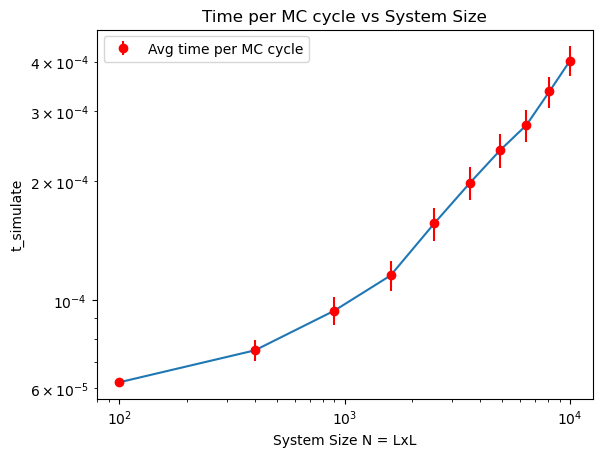

The overhead of this plot is -1.1792945861816386e-05 seconds
The slope is 3.7687443241928566e-06.


Timer unit: 1e-07 s

Total time: 0.724119 s
File: C:\Users\mo241\AppData\Local\Temp\ipykernel_32712\7958692.py
Function: simulate_ising at line 23

Line #      Hits         Time  Per Hit   % Time  Line Contents
    23                                           def simulate_ising(L, init_state, T, J, N_mc, random_seed=None):
    24                                             '''
    25                                             A function that takes in a grid size, initial state, Temperature
    26                                             J, Monte Carlo steps, and random seed. This builds a 2D Ising model using the
    27                                             Metropolis algorithm.
    28                                           
    29                                             This function also calculates t_simulate, the time required per MC cycle.
    30                                             '''
    31         1        104.0    104.0      0.0    np.random.seed(random

In [62]:
#References

#[1]https://www.w3schools.com/python/ref_random_seed.asp
#[2]https://stackoverflow.com/questions/66425508/what-is-the-meaning-of-for-in-range
#[3]https://pythoninchemistry.org/sim_and_scat/important_considerations/pbc.html
#[4]https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
#[5]https://github.com/MrFuguDataScience/Python_Basics/blob/main/Python_Profiling.ipynb
#[6]https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb

#importing libraries
%pip install line_profiler
%pip install memory_profiler


import numpy as np
import matplotlib.pyplot as plt
import time
from line_profiler import LineProfiler
from memory_profiler import profile
from scipy import stats


def simulate_ising(L, init_state, T, J, N_mc, random_seed=None):
  '''
  A function that takes in a grid size, initial state, Temperature
  J, Monte Carlo steps, and random seed. This builds a 2D Ising model using the
  Metropolis algorithm.

  This function also calculates t_simulate, the time required per MC cycle.
  '''
  np.random.seed(random_seed)

  #First step is to initialize spins of ising grid
  # all_up = +1 , all_down = -1, random = +1 or -1
  if init_state == "all_up":
    state = np.ones((L,L), dtype=np.int8)
  elif init_state == "all_down":
    state = -np.ones((L,L), dtype=np.int8)
  elif init_state == "random":
    state = np.random.choice([-1,1], size=(L, L).astype(np.int8))

  #Initialize trajectory array and time spent per MC cycle array

  beta = 1/T

  trajectory = np.zeros((N_mc, L, L))
  time_per_mcmove = np.zeros(N_mc)
  

  for step in range(N_mc):
    t_start = time.time()
  

    #Checkerboard algorithm (grouping black and white grids together)
    for checkerboard in [0, 1]:  # First update "black" cells (i + j is even), then "white" cells (i + j is odd)
      
      indices = np.indices((L,L)) #i and j
      checkerboard_mask = (indices[0]+indices[1]) % 2 == checkerboard 

      neighbor_sum = (np.roll(state, 1, axis=0) + np.roll(state, -1, axis=0) + np.roll(state, 1, axis=1) + np.roll(state, -1, axis=1))
      
      #Calculate energy change
      spin = state[checkerboard_mask]
      neighbor = neighbor_sum[checkerboard_mask]
      dE = 2 * J * spin * neighbor

      #Metropolis criterion
      flip_mask = (dE < 0) | (np.random.random(spin.shape) < np.exp(-beta * dE))

      state[checkerboard_mask] *= np.where(flip_mask, -1, 1) #If flip is true,then the state gets flipped, if not then it remains the same

    t_end = time.time()
    #expression to calculate the execution time of mc_move
    time_per_mcmove[step] = t_end - t_start
    trajectory[step] = state.copy()
  t_simulate = np.mean(time_per_mcmove) #averages the execution time from the 1500 MC steps

  return trajectory, t_simulate

'''def plot_state(trajectory, step):
  ising_grid = trajectory[step]

  plt.imshow(ising_grid, cmap='gray') #Purpose of imshow - each site (represented by a square) is denoted by an upspin or downspin [4]
  plt.title(f'Trajectory Plot at Step {step}')
  plt.colorbar(label ='spin')
  plt.show()
'''

def run_simulations(grid_size, T, J, N_mc):
  """
  Calculate t_simulate for each N (LxL)
  """

  times_per_cycle = []
  errors = []

  for L in grid_size:
    _, avg_time_per_cycle = simulate_ising(L, init_state = init_state, T=T, J=J, N_mc = N_mc, random_seed=random_seed)
    times_per_cycle.append(avg_time_per_cycle)

    #Standard error for t_simulate
    std_error = np.std(times_per_cycle) / np.sqrt(len(times_per_cycle))
    errors.append(std_error)

    print(f'System size {L}x{L}: Avg time per MC cycle = {avg_time_per_cycle:.5f} seconds')

  return grid_size, times_per_cycle, errors



def calc_magnetization(trajectory):
  """
  Calculate magnetization for each Ising grid
  """
  magnetization = []
  L = trajectory.shape[1]
  for state in trajectory:
    M = np.sum(state) / (L*L)
    magnetization.append(M)
  return np.array(magnetization)



def run_mag_calc(grid_size, N_mc, J, random_seed=None):
  '''
  #Calculate average magnetization for each N (LxL)

'''

  magnetizations_values = []
  magnetizations_errors = []

  for L in grid_size :
      #Simulate ising at current grid size
      trajectory, _ = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)
      magnetization_all_steps = calc_magnetization(trajectory)

      #Updating magnetization array by getting rid of first 500 equilibration steps
      updated_magnetization = magnetization_all_steps[500:]

      #Average magnetization and standard deviation at each grid size
      avg_magnetization = np.mean(updated_magnetization)
      std_error = np.std(updated_magnetization) / np.sqrt(1000)

      #Store results
      magnetizations_values.append(avg_magnetization)
      magnetizations_errors.append(std_error)

      print(f'System size {L}x{L}: Magnetization = {avg_magnetization:.5f}')

  return magnetizations_values, magnetizations_errors




'''def sweep(L, temperatures, N_mc, J, random_seed=None):

  #Sweep functions performs the simulate_ising function for the entire
  #temperature range. It then calculates the average magnetization at each temperature that will
  #be needed for one of the plots.


  temperatures=[]
  magnetizations = []

  for T in temperature_range:
      #Simulate ising at current temperature
      trajectory = simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)

      #calculate magnetizations at each temperature
      mags = calc_magnetization(trajectory)
      #print(mags)

      #Average magnetization at current temperature
      avg_magnetization = np.mean(mags)
      #print(avg_magnetization)

      #Store results
      temperatures.append(T)
      magnetizations.append(avg_magnetization)

  return np.array(temperatures), np.array(magnetizations)

def plot_Mag_vs_Temp(temperatures, magnetizations):
  # Plot Magnetization vs Temperature
  plt.figure(figsize=(12, 5))
  plt.plot(temperatures, magnetizations, marker='o', linestyle='-', label = 'Average Magnetizations')
  plt.title("Magnetization vs Temperature")
  plt.xlabel("Temperature")
  plt.ylabel("Magnetization")
  plt.legend()
  plt.tight_layout()
  plt.show()


def plot_Mag_Time_Series(magnetization):
  #Plot Magnetization as Time Series
  plt.plot(magnetization)
  plt.xlabel('Monte Carlo Steps (Time)')
  plt.ylabel('Magnetization')
  plt.title('Magnetization vs Time at T = 2.27')
  plt.show()
'''

def plot_tsim_vs_N(L_values, t_sim, tsim_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, t_sim, yerr=tsim_errors, fmt='o', color='r', label='Avg time per MC cycle')
  plt.plot(N_values, t_sim)
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('System Size N = LxL')
  plt.ylabel('t_simulate')
  plt.title('Time per MC cycle vs System Size')
  plt.legend()
  plt.show()

'''
def plot_mag_vs_N(L_values, magnetizations_values, magnetizations_errors):
  N_values = np.array(L_values**2)
  plt.figure()
  plt.errorbar(N_values, magnetizations_values, yerr=magnetizations_errors, fmt='o', color='r')
  plt.plot(N_values, magnetizations_values)
  plt.xlabel('System Size N = LxL')
  plt.ylabel('Magnetizations')
  plt.title('Magnetizations vs System Size')
  plt.show()
'''

#temperature_range = np.linspace(1, 4.0, 20)
init_state = "all_up" #initial state
grid_size = np.linspace(10,100,10, dtype=int) #grid size
J = 1.0
N_mc = 1500
T=5

random_seed = np.random.randint(0, N_mc) #how to make it jax related??
step = np.random.randint(0, N_mc) #how to make it jax related??

#Running functions for t_sim vs N
L_values, t_simulate, tsim_errors = run_simulations(grid_size, T, J, N_mc)
plot_tsim_vs_N(L_values, t_simulate, tsim_errors)
#Overhead 
results = stats.linregress(L_values, t_simulate)
print(f'The overhead of this plot is {results.intercept} seconds')
print(f'The slope is {results.slope}.')

'''
#Running functions for Mag vs N
mag_values, mag_errors = run_mag_calc(grid_size, N_mc, J, random_seed=random_seed)
plot_mag_vs_N(L_values, mag_values, mag_errors)
'''


'''
# Plotting state functions near and not near critical temperature
trajectory_up = simulate_ising(L, init_state = 'all_up', T=1.5, J=1.0, N_mc=N_mc, random_seed=None) #mostly all have the same upspin and maintains magnetism
plot_state(trajectory_up, step)
trajectory_up_crit = simulate_ising(L, init_state = 'all_up', T=2.27, J=1.0, N_mc=N_mc, random_seed=None) #near the critical point and magnetism approaches 0
plot_state(trajectory_up_crit, step)
trajectory_up_after_crit = simulate_ising(L, init_state = 'all_up', T=4.0, J=1.0, N_mc=N_mc, random_seed=None) #magentism is near 0 and loses its magentic properties at high T
plot_state(trajectory_up_after_crit, step)

#Performing a sweep of temperature range and plotting Magnetization w/ temperature
temperatures, magnetizations = sweep(L, temperature_range, N_mc, J, random_seed)
plot_Mag_vs_Temp(temperatures, magnetizations)

#Plotting the Time Series Curve for Magnetization
trajectory_critical = simulate_ising(L, init_state = 'random', T=2.27, J=J, N_mc=N_mc, random_seed=None)
mag_at_tc = calc_magnetization(trajectory_critical)
plot_Mag_Time_Series(mag_at_tc)
'''

#Line Profiler [5]
for L in grid_size:
  %lprun -f simulate_ising simulate_ising(L, init_state, T=T, J=J, N_mc=N_mc, random_seed=random_seed)

In [ ]:
**Responses for HW3**
'''
1)
Tabulated breakdown of the code of line and memory profiler is shown in "Mohammed_Rhakib_HW3_Improving_Ising.ipynb"
For L=10, simulate_ising took 0.83 seconds and memory usages was 149.1 MB.
The part that contributed the most to the execution time is the selection of random integers for random spin with coordinates (i, j)
The part the contributed to the most of the memory allocation is the spin flip once the criterion is met.

2)
Itemized list: Used np.roll() to avoid looping over each spin individually, lower precision integers to help save memory (this did not make a huge impact), and precomputed random variables to reduce computation time
Impact on execution time: For the L=10 case, the execution time decreased by ~.12 seconds based on the results from the line profiler.
Impact of memory: The memory allocation worsened (I do not understand why). With the optimizations, 149.6 MB was used for Q2 compared to 149.1 MB for Q1 (an increase of 0.5 MB)

3)
Code implementation of checkerboard and log-log plot shown in "Mohammed_Rhakib_HW3_Improving_Ising.ipynb". & "HW2.ipynb"
In terms of execution time, the checkerboard technique far exceeds the Ising model without the checkerbard. Using the line profilers, the average time it took to run the model from L = 1 to L = 10 was 0.73 seconds for checkerboard and 80.4 seconds for the Ising model without the checkerboard. 
This means that the checkerboard algorithm runs 110 faster than the old model. 
In terms of overhead, the overhead of the Ising model using the checkerboard algorithm is 2 magnitudes smaller than the Ising model without the checkerboard algorithm. (Overhead w/o checkerboard (9x10^-3 seconds) and overhead w/ checkerboard (1x10^-5 seconds)). 
The overhead is much smaller using the checkerboard algorithm.
When comparing the time complexities of both models, they both exhibit O(N) notation. This means that both models show linear time complexity. However, their slopes are differrent. 
The slope of the Ising model with the checkerboard algorithm is 100 times smaller than the old Ising model (3.77 x 10^-6 vs 4.70 x 10^-4). 
In conclusion, the checkerbaord algorthm was able to reduce the slope, the time it takes to complete the Ising model as the system size increases.

'''